2D Gaussian-like array:
[[0.36787944 0.44822088 0.51979489 0.57375342 0.60279818 0.60279818
  0.57375342 0.51979489 0.44822088 0.36787944]
 [0.44822088 0.54610814 0.63331324 0.69905581 0.73444367 0.73444367
  0.69905581 0.63331324 0.54610814 0.44822088]
 [0.51979489 0.63331324 0.73444367 0.81068432 0.85172308 0.85172308
  0.81068432 0.73444367 0.63331324 0.51979489]
 [0.57375342 0.69905581 0.81068432 0.89483932 0.9401382  0.9401382
  0.89483932 0.81068432 0.69905581 0.57375342]
 [0.60279818 0.73444367 0.85172308 0.9401382  0.98773022 0.98773022
  0.9401382  0.85172308 0.73444367 0.60279818]
 [0.60279818 0.73444367 0.85172308 0.9401382  0.98773022 0.98773022
  0.9401382  0.85172308 0.73444367 0.60279818]
 [0.57375342 0.69905581 0.81068432 0.89483932 0.9401382  0.9401382
  0.89483932 0.81068432 0.69905581 0.57375342]
 [0.51979489 0.63331324 0.73444367 0.81068432 0.85172308 0.85172308
  0.81068432 0.73444367 0.63331324 0.51979489]
 [0.44822088 0.54610814 0.63331324 0.69905581 0.73444367 0

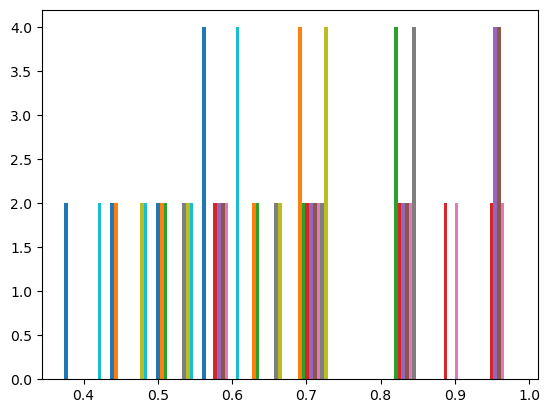

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Generating 2D grids 'x' and 'y' using meshgrid with 10 evenly spaced points from -1 to 1
x, y = np.meshgrid(np.linspace(-1, 1, 10), np.linspace(-1, 1, 10))

# Calculating the Euclidean distance 'd' from the origin using the generated grids 'x' and 'y'
d = np.sqrt(x*x + y*y)

# Defining parameters sigma and mu for a Gaussian-like distribution
sigma, mu = 1.0, 0.0

# Calculating the Gaussian-like distribution 'g' based on the distance 'd', sigma, and mu
g = np.exp(-((d - mu)**2 / (2.0 * sigma**2)))

# Printing a message indicating a 2D Gaussian-like array will be displayed
print("2D Gaussian-like array:")

# Printing the calculated 2D Gaussian-like array 'g'
print(g) 

plt.hist(g)
plt.show()


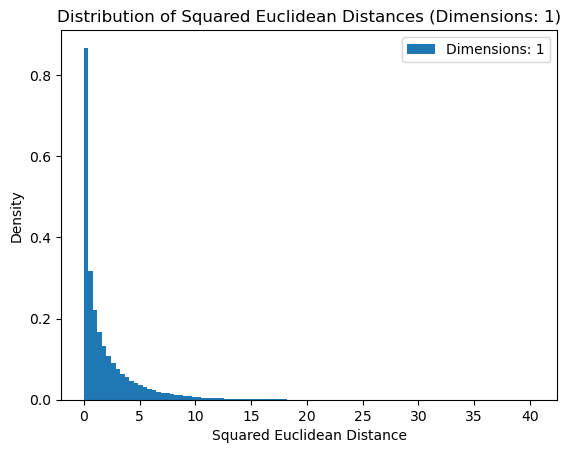

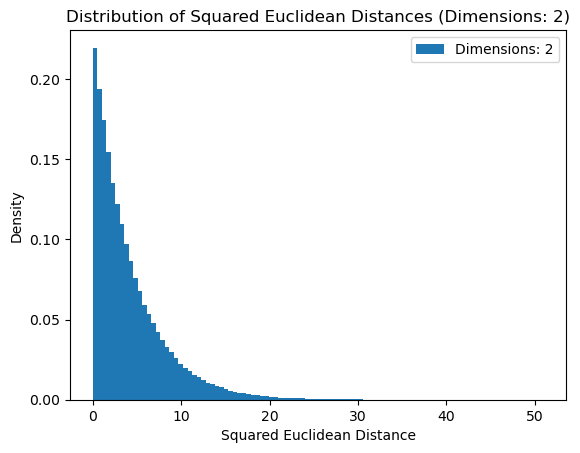

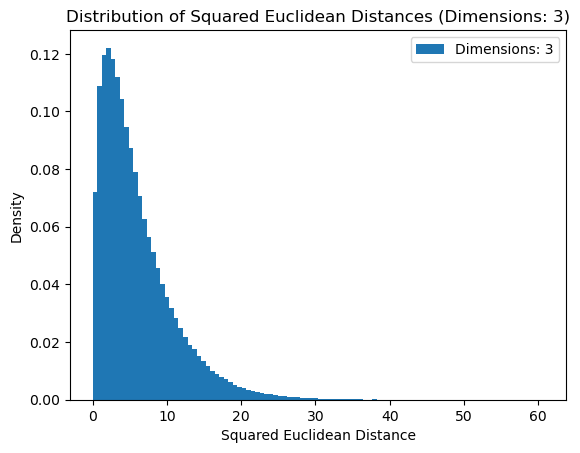

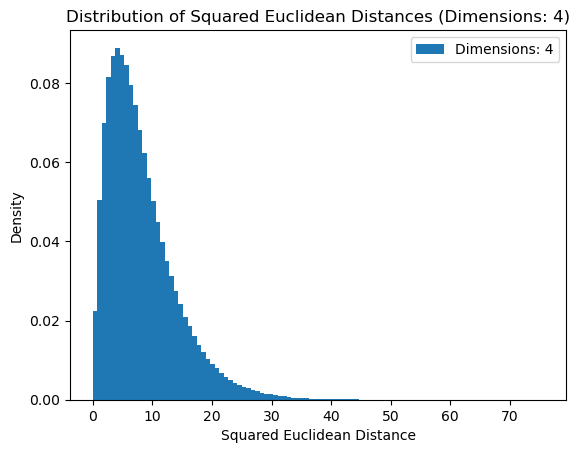

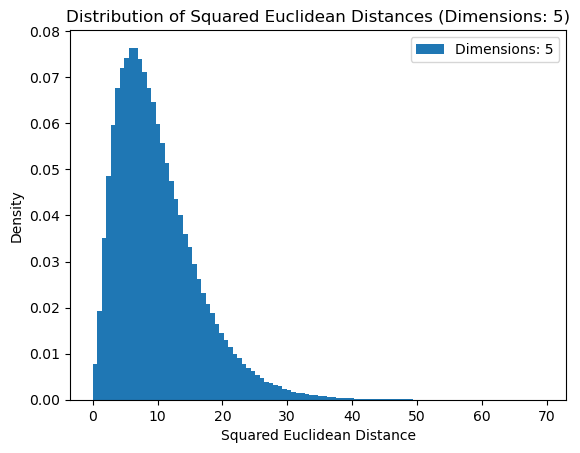

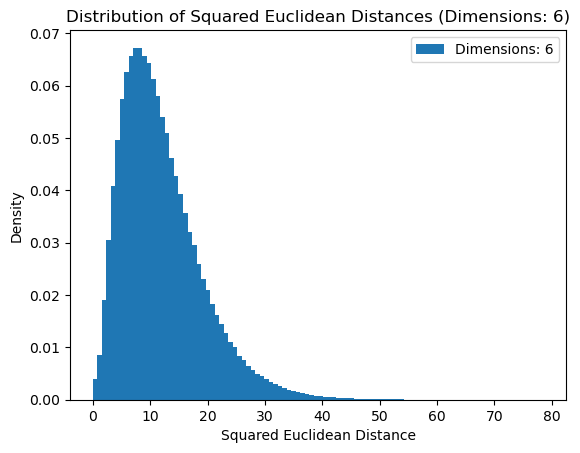

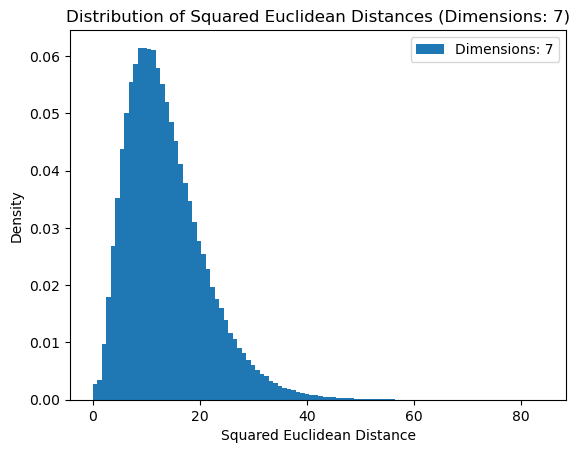

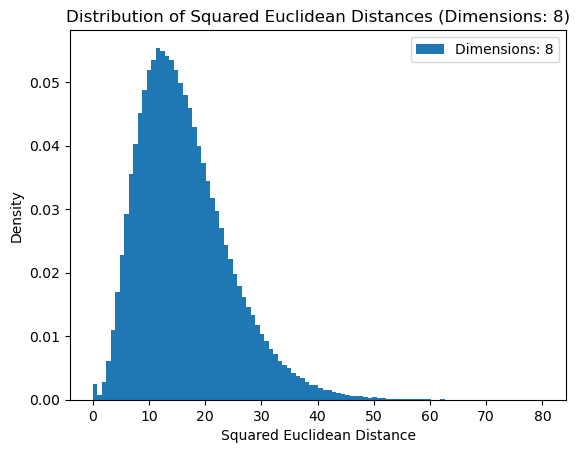

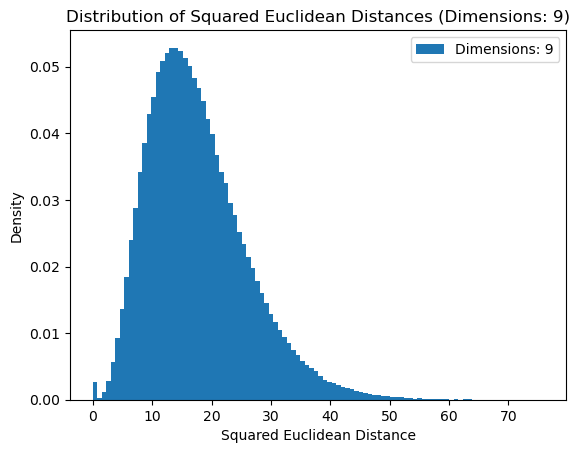

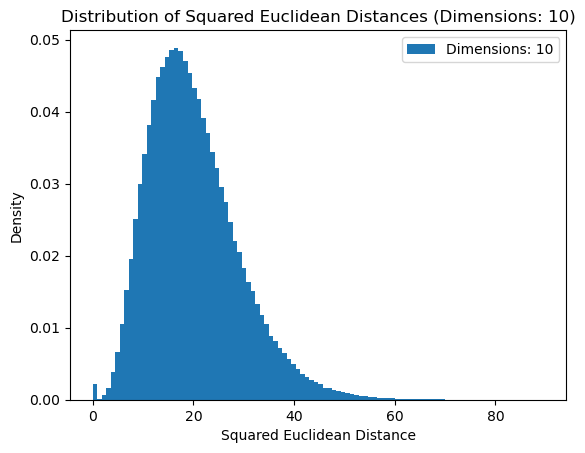

Distance distributions plotted for each dimension using matplotlib.


In [31]:
import numpy as np
import matplotlib.pyplot as plt

def generate_normal_samples(num_samples, dimensions, mean=0, std=1):
  """
  Generates samples from a multivariate normal distribution.

  Args:
      num_samples: Number of samples to generate.
      dimensions: Number of dimensions for the distribution.
      mean: Mean of the distribution (default 0).
      std: Standard deviation of the distribution (default 1).

  Returns:
      A NumPy array of shape (num_samples, dimensions) containing the samples.
  """
  return np.random.normal(loc=mean, scale=std, size=(num_samples, dimensions))

def calculate_pairwise_distances(samples):
  """
  Calculates the pairwise squared Euclidean distances between samples.

  Args:
      samples: A NumPy array of shape (num_samples, dimensions) containing the samples.

  Returns:
      A NumPy array of shape (num_samples, num_samples) containing the pairwise squared distances.
  """
  # Efficiently calculate squared distances using broadcasting

  difference_samples = samples[:, None] - samples[None, :]
  return np.square(np.linalg.norm(difference_samples, axis=2))

def plot_distance_distribution(distances, dimensions, title):
  """
  Plots the distribution of pairwise squared Euclidean distances using matplotlib.

  Args:
      distances: A NumPy array of shape (num_samples, num_samples) containing the pairwise squared distances.
      dimensions: Number of dimensions for the distribution.
      title: Title for the plot.
  """
  # Filter out diagonal (zero distance) using boolean indexing
  mask = np.tril(np.ones(distances.shape), k=-1) == 0
  distances = distances[mask]

  # Plot the histogram
  plt.hist(distances, bins=100, density=True, label=f"Dimensions: {dimensions}")
  plt.xlabel("Squared Euclidean Distance")
  plt.ylabel("Density")
  plt.title(title)
  plt.legend()
  plt.show()

# Set parameters
num_samples = 1000
dimensions_list = range(1, 11)  # Range of dimensions to explore

# Generate samples and calculate distances for each dimension
for dimensions in dimensions_list:
  samples = generate_normal_samples(num_samples, dimensions)
  distances = calculate_pairwise_distances(samples)
  title = f"Distribution of Squared Euclidean Distances (Dimensions: {dimensions})"
  plot_distance_distribution(distances, dimensions, title)

print("Distance distributions plotted for each dimension using matplotlib.")



In [33]:
# Simple experiments

samples = np.array([1, 2, 2, 2, 3, 1])
post_none = samples[:, None]
pre_none = samples[None, :]
diff = post_none - pre_none
print(samples)
print(post_none)
print(pre_none)
print(diff)

[1 2 2 2 3 1]
[[1]
 [2]
 [2]
 [2]
 [3]
 [1]]
[[1 2 2 2 3 1]]
[[ 0 -1 -1 -1 -2  0]
 [ 1  0  0  0 -1  1]
 [ 1  0  0  0 -1  1]
 [ 1  0  0  0 -1  1]
 [ 2  1  1  1  0  2]
 [ 0 -1 -1 -1 -2  0]]


In [35]:
distances = np.array([[0, 1, 2, 3],
                       [1, 0, 4, 5],
                       [2, 4, 0, 6],
                       [3, 5, 6, 0]])

mask = np.tril(np.ones(distances.shape), k=-1) == 0
filtered_distances = distances[mask]

print("Original distances:\n", distances)
print("\nFiltered distances:\n", filtered_distances)


Original distances:
 [[0 1 2 3]
 [1 0 4 5]
 [2 4 0 6]
 [3 5 6 0]]

Filtered distances:
 [0 1 2 3 0 4 5 0 6 0]
